## Setup

In [1]:
# Facial image emotion recognition using CNN
# Target classes: Angry, Disgusted, Fearful, Happy, Sad, Surprised, Neutral

import tensorflow as tf

NUM_THREADS = 32

tf.config.threading.set_intra_op_parallelism_threads(NUM_THREADS)
tf.config.threading.set_inter_op_parallelism_threads(NUM_THREADS)

# Switch to GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
print(physical_devices)
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


# DATASET
# files in dataset/test and dataset/train
# subfolders: angry, disgusted, fearful, happy, sad, surprised, neutral

# load dataset
train_dir = 'dataset_RAF_DB/train'
test_dir = 'dataset_RAF_DB/test'

2024-07-08 14:40:22.638946: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-08 14:40:22.662654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 14:40:23.261801: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-07-08 14:40:23.998550: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:40:24.045363: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-08 14:40:24.045392: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
# Test data
# Check for the number of images in each class and the size of the images
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0'  # 0 = alle Meldungen werden ausgegeben

# List of classes
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Number of images in each class
print('Number of training images in each class:')
for c in classes:
    path = os.path.join(train_dir, c)
    print(f'{c}: {len(os.listdir(path))} images')
    
print('\nNumber of test images in each class:')
for c in classes:
    path = os.path.join(test_dir, c)
    print(f'{c}: {len(os.listdir(path))} images')
    
# Image size
img = cv2.imread('dataset/train/angry/Training_3908.jpg')
print(f'\nImage size: {img.shape}')

input_shape = img.shape

# Reduce image size to 48x48 pixels due to greyscale (original size: 48x48x3)
input_shape = (48, 48, 1)

Number of training images in each class:
angry: 705 images
disgust: 717 images
fear: 281 images
happy: 4772 images
sad: 1982 images
surprise: 1290 images
neutral: 2524 images

Number of test images in each class:
angry: 162 images
disgust: 160 images
fear: 74 images
happy: 1185 images
sad: 478 images
surprise: 329 images
neutral: 680 images

Image size: (48, 48, 3)


## Preparing different models

In [19]:
# CNN MODEL
input_layer = tf.keras.layers.Input(shape=input_shape)

# Erster konventioneller Convolutional Pfad
conv1 = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(input_layer)
conv1 = tf.keras.layers.BatchNormalization()(conv1)
conv1 = tf.keras.layers.ReLU()(conv1)
conv1 = tf.keras.layers.MaxPooling2D(2, 2)(conv1)
dropout1 = tf.keras.layers.Dropout(0.3)(conv1)

# Zweiter konventioneller Convolutional Pfad
conv2 = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(dropout1)
conv2 = tf.keras.layers.BatchNormalization()(conv2)
conv2 = tf.keras.layers.ReLU()(conv2)
conv2 = tf.keras.layers.MaxPooling2D(2, 2)(conv2)
dropout2 = tf.keras.layers.Dropout(0.3)(conv2)

# Dritter konventioneller Convolutional Pfad
conv3 = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(conv2)
conv3 = tf.keras.layers.BatchNormalization()(conv3)
conv3 = tf.keras.layers.LeakyReLU(negative_slope=0.01)(conv3)
conv3 = tf.keras.layers.MaxPooling2D(2, 2)(conv3)
dropout3 = tf.keras.layers.Dropout(0.3)(conv3)

# Vierter konventioneller Convolutional Pfad
conv4 = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(dropout3)
conv4 = tf.keras.layers.BatchNormalization()(conv4)
conv4 = tf.keras.layers.LeakyReLU(negative_slope=0.01)(conv4)
conv4 = tf.keras.layers.MaxPooling2D(2, 2)(conv4)
dropout4 = tf.keras.layers.Dropout(0.3)(conv4)

# Paralleler Pfad mit Dilated Convolutions
# dilated1 = tf.keras.layers.Conv2D(32, (3, 3), padding='same', dilation_rate=3)(input_layer)
# dilated1 = tf.keras.layers.BatchNormalization()(dilated1)
# dilated1 = tf.keras.layers.LeakyReLU(negative_slope=0.001)(dilated1)
# dilated1 = tf.keras.layers.MaxPooling2D(2, 2)(dilated1)
# dropout1dilated = tf.keras.layers.Dropout(0.3)(dilated1)

# dilated2 = tf.keras.layers.Conv2D(64, (3, 3), padding='same', dilation_rate=3)(dropout1dilated)
# dilated2 = tf.keras.layers.BatchNormalization()(dilated2)
# dilated2 = tf.keras.layers.LeakyReLU(negative_slope=0.001)(dilated2)
# dilated2 = tf.keras.layers.MaxPooling2D(2, 2)(dilated2)
# dropout2dilated = tf.keras.layers.Dropout(0.3)(dilated2)

# dilated3 = tf.keras.layers.Conv2D(256, (3, 3), padding='same', dilation_rate=4)(dilated2)
# dilated3 = tf.keras.layers.BatchNormalization()(dilated3)
# dilated3 = tf.keras.layers.LeakyReLU(negative_slope=0.01)(dilated3)
# dilated3 = tf.keras.layers.MaxPooling2D(2, 2)(dilated3)

# Zusammenführung der Pfade
merged = tf.keras.layers.concatenate([dropout4])

# Flatten und Dense Layers
flat = tf.keras.layers.Flatten()(merged)
dense1 = tf.keras.layers.Dense(256)(flat)
dense1 = tf.keras.layers.BatchNormalization()(dense1)
dense1 = tf.keras.layers.ReLU()(dense1)
dropout = tf.keras.layers.Dropout(0.3)(dense1)
output = tf.keras.layers.Dense(7, activation='softmax')(dropout)

# Modell definieren
model = tf.keras.models.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 48, 48, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 48, 48, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_1 (Concatenate)     │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       295,16

 Total params: 396,103 (1.51 MB)

 Trainable params: 395,111 (1.51 MB)

 Non-trainable params: 992 (3.88 KB)

## Loading the images from disk

In [4]:
greyscale = True
augmentation = True

In [10]:
def normalize_image(img):
    img = tf.cast(img, tf.float32) / 255.0  # normalize to [0,1] range
    return img

# Load the data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',  # Integer-Labels
    image_size=(48, 48),
    batch_size=64,
    color_mode='grayscale' if greyscale else 'rgb',
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',  # Integer-Labels
    image_size=(48, 48),
    batch_size=64,
    color_mode='grayscale' if greyscale else 'rgb',
)

# Normalize the images to [0,1]
train_ds = train_ds.map(lambda img, label: (normalize_image(img), label))
test_ds = test_ds.map(lambda img, label: (normalize_image(img), label))

# One-Hot-Encoding of the labels
def one_hot_encode(image, label):
    label = tf.one_hot(label, depth=num_classes)
    return image, label

num_classes = 7

train_ds = train_ds.map(one_hot_encode)
test_ds = test_ds.map(one_hot_encode)

Found 12271 files belonging to 7 classes.
Found 3068 files belonging to 7 classes.


In [11]:
def augment(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, max_delta=0.5)
    img = tf.image.random_contrast(img, lower=0.6, upper=1.4)
    return img, label

def augment_multiple(img, label, num_augmentations=5):
    augmented_images = []
    augmented_labels = []
    for _ in range(num_augmentations):
        augmented_img, augmented_label = augment(img, label)
        augmented_images.append(augmented_img)
        augmented_labels.append(augmented_label)
    return tf.data.Dataset.from_tensor_slices((augmented_images, augmented_labels))

# Number of augmentations per image
num_augmentations = 10

# Augment the training data
if augmentation:
    augmented_datasets = train_ds.flat_map(lambda img, label: augment_multiple(img, label, num_augmentations))
    train_ds = train_ds.concatenate(augmented_datasets)

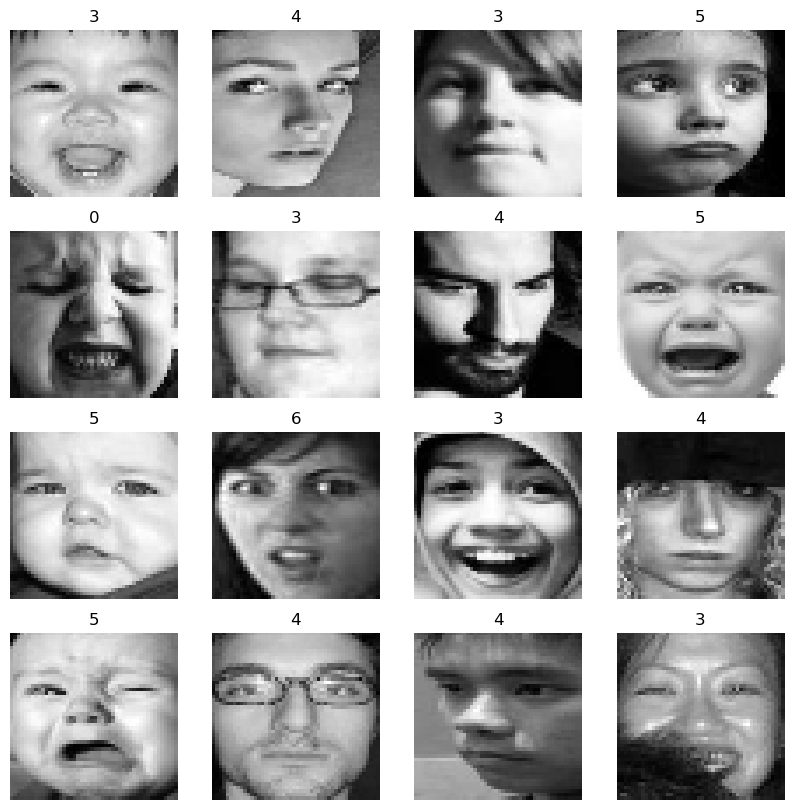

2024-07-08 14:50:17.007137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Show the first 16 images and their labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        if greyscale:
            plt.imshow(np.squeeze(images[i]), cmap='gray')
        else:
            plt.imshow(images[i])
        plt.title(np.argmax(labels[i]))
        plt.axis('off')
    plt.show()


Image shape: (64, 48, 48, 1), Label dtype: <dtype: 'float32'>
Image dtype: <dtype: 'float32'>, Label dtype: <dtype: 'float32'>


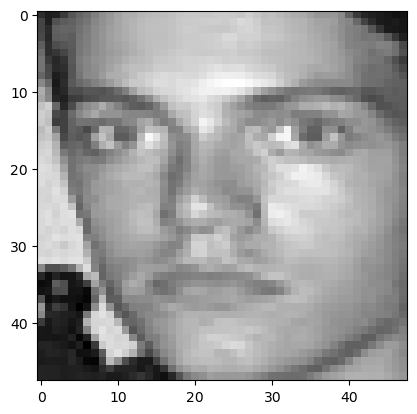

2024-07-08 14:50:21.040452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [13]:
# Print one image (to confirm whether the images are represented as 48x48x1 tensors)
for img, label in train_ds.take(1):
    print(f"Image shape: {img.shape}, Label dtype: {label.dtype}")
    print(f"Image dtype: {img.dtype}, Label dtype: {label.dtype}")
    
    # Plot the image
    if greyscale:
        plt.imshow(np.squeeze(img[0]), cmap='gray')
    else:
        plt.imshow(img[0])
    plt.show()

## Class distribution and weights

In [14]:
import collections

def get_class_distribution(dataset):
    class_counts = collections.Counter()
    
    for _, label_batch in dataset:
        labels = tf.argmax(label_batch, axis=1)
        class_counts.update(labels.numpy())
    
    return class_counts

# Klassenverteilung im Trainingsdatensatz
train_class_distribution = get_class_distribution(train_ds)
print("Train Class Distribution:", train_class_distribution)

# Klassenverteilung im Testdatensatz
test_class_distribution = get_class_distribution(test_ds)
print("Test Class Distribution:", test_class_distribution)


2024-07-08 14:50:28.553277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Train Class Distribution: Counter({3: 52492, 4: 27764, 5: 21802, 6: 14190, 1: 7887, 0: 7755, 2: 3091})
Test Class Distribution: Counter({3: 1185, 4: 680, 5: 478, 6: 329, 0: 162, 1: 160, 2: 74})


2024-07-08 14:50:29.107180: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
import sklearn
from sklearn.utils import class_weight

# Load test data
x_train = []
y_train = []

for i, c in enumerate(classes):
    path = os.path.join(train_dir, c)
    for img_name in os.listdir(path):
        # img = cv2.imread(os.path.join(path, img_name))
        if img is not None:  # Ensure the image was read correctly
            # img = cv2.resize(img, (48, 48))
            # x_train.append(img)
            y_train.append(i)

In [16]:
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=7)

# Nehme an, y_train_labels sind die Labels deiner Trainingsdaten
y_train_labels = np.argmax(y_train_encoded, axis=1)
y_train_labels = y_train_labels.astype(np.int32)

# Berechnung der Klassengewichte
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train_labels),
                                                  y=y_train_labels)

# Convert the class weights to a dictionary. Use np.int32 as the key type
class_weights_dict = {int(k): float(v) for k, v in zip(np.unique(y_train_labels), class_weights)}

print("Class weights:", class_weights_dict)
# Print the type of keys in the dictionary
print("Type of keys:", type(list(class_weights_dict.keys())[0]))
# Print the type of values in the dictionary
print("Type of values:", type(list(class_weights_dict.values())[0]))

Class weights: {0: 2.4865248226950354, 1: 2.4449093444909344, 2: 6.238434163701068, 3: 0.3673512154233026, 4: 0.884460141271443, 5: 1.3589147286821706, 6: 0.6945324881141046}
Type of keys: <class 'int'>
Type of values: <class 'float'>


In [25]:
# Callback functions
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=50, restore_best_weights=True, mode='max')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, min_lr=0.00001, mode='max')


In [18]:
for image, label in train_ds.take(1):  # Only take the first batch
    print(label[0])  # Show the label

tf.Tensor([0. 0. 0. 1. 0. 0. 0.], shape=(7,), dtype=float32)


2024-07-08 14:51:34.417230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


## Training & Evaluation

In [26]:
history = model.fit(
    train_ds,
    class_weight=class_weights_dict,
    epochs=5000,
    validation_data=test_ds,
    callbacks=[reduce_lr, early_stopping],
)

Epoch 1/5000
   2108/Unknown 6s 3ms/step - accuracy: 0.8116 - loss: 0.4571

2024-07-08 15:08:44.273655: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:08:44.273692: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:08:44.273704: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978
2024-07-08 15:08:44.273709: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
/home/renlephy/miniconda3/envs/tf_gpu2/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.

2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8116 - loss: 0.4571 - val_accuracy: 0.7718 - val_loss: 0.7211 - learning_rate: 0.0025
Epoch 2/5000
2111/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8191 - loss: 0.4345

2024-07-08 15:08:50.949016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:08:50.949043: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:08:50.949048: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:08:50.949052: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:08:50.949064: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8191 - loss: 0.4345 - val_accuracy: 0.7673 - val_loss: 0.7158 - learning_rate: 0.0025
Epoch 3/5000
2090/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4325

2024-07-08 15:08:57.604074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:08:57.604119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8207 - loss: 0.4325 - val_accuracy: 0.7696 - val_loss: 0.7057 - learning_rate: 0.0025
Epoch 4/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8253 - loss: 0.4169

2024-07-08 15:09:04.215028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:04.215060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:09:04.215066: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:09:04.215069: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:09:04.215101: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8253 - loss: 0.4170 - val_accuracy: 0.7630 - val_loss: 0.6996 - learning_rate: 0.0025
Epoch 5/5000
2103/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8236 - loss: 0.4268

2024-07-08 15:09:10.891280: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:10.891318: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8236 - loss: 0.4268 - val_accuracy: 0.7402 - val_loss: 0.7828 - learning_rate: 0.0025
Epoch 6/5000
2094/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8227 - loss: 0.4166

2024-07-08 15:09:17.470805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:17.470860: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:09:17.470873: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:09:17.470881: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:09:17.470913: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8227 - loss: 0.4167 - val_accuracy: 0.7503 - val_loss: 0.7335 - learning_rate: 0.0025
Epoch 7/5000
2099/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8246 - loss: 0.4103

2024-07-08 15:09:24.154283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:24.154323: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8246 - loss: 0.4103 - val_accuracy: 0.7637 - val_loss: 0.7157 - learning_rate: 0.0012
Epoch 8/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.4046

2024-07-08 15:09:30.777897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:30.777926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:09:30.777932: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:09:30.777935: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:09:30.777947: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8286 - loss: 0.4046 - val_accuracy: 0.7728 - val_loss: 0.7121 - learning_rate: 0.0012
Epoch 9/5000
2101/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8283 - loss: 0.4051

2024-07-08 15:09:37.390074: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:37.390106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:09:37.390112: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:09:37.390115: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:09:37.390131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8283 - loss: 0.4051 - val_accuracy: 0.7617 - val_loss: 0.7114 - learning_rate: 0.0012
Epoch 10/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8258 - loss: 0.4079

2024-07-08 15:09:44.123913: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:44.123944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:09:44.123950: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:09:44.123954: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:09:44.123967: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8258 - loss: 0.4079 - val_accuracy: 0.7673 - val_loss: 0.7130 - learning_rate: 0.0012
Epoch 11/5000
2105/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8322 - loss: 0.3977

2024-07-08 15:09:50.893287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:50.893328: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-07-08 15:09:50.893350: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8322 - loss: 0.3978 - val_accuracy: 0.7572 - val_loss: 0.7377 - learning_rate: 0.0012
Epoch 12/5000
2084/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8286 - loss: 0.4020

2024-07-08 15:09:57.481033: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:09:57.481063: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:09:57.481069: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:09:57.481073: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:09:57.481085: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8285 - loss: 0.4021 - val_accuracy: 0.7702 - val_loss: 0.7030 - learning_rate: 0.0012
Epoch 13/5000
2084/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8326 - loss: 0.3943

2024-07-08 15:10:04.170756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:04.170786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:04.170792: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:04.170795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:04.170811: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8325 - loss: 0.3944 - val_accuracy: 0.7660 - val_loss: 0.7246 - learning_rate: 0.0012
Epoch 14/5000
2085/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8296 - loss: 0.4037

2024-07-08 15:10:10.839637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:10.839665: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:10.839670: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:10.839674: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:10.839686: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8296 - loss: 0.4038 - val_accuracy: 0.7715 - val_loss: 0.6971 - learning_rate: 6.2500e-04
Epoch 15/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8302 - loss: 0.3910

2024-07-08 15:10:17.468388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:17.468418: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:17.468424: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:17.468427: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:17.468441: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8302 - loss: 0.3910 - val_accuracy: 0.7738 - val_loss: 0.6917 - learning_rate: 6.2500e-04
Epoch 16/5000
2088/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8326 - loss: 0.3912

2024-07-08 15:10:24.213091: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:24.213124: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:24.213129: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:24.213132: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:24.213144: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8326 - loss: 0.3912 - val_accuracy: 0.7692 - val_loss: 0.7042 - learning_rate: 6.2500e-04
Epoch 17/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8303 - loss: 0.3955

2024-07-08 15:10:30.898760: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:30.898791: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:30.898797: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:30.898800: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:30.898813: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8303 - loss: 0.3955 - val_accuracy: 0.7774 - val_loss: 0.6885 - learning_rate: 6.2500e-04
Epoch 18/5000
2111/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8344 - loss: 0.3919

2024-07-08 15:10:37.760666: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:37.760706: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8344 - loss: 0.3919 - val_accuracy: 0.7718 - val_loss: 0.7014 - learning_rate: 6.2500e-04
Epoch 19/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8294 - loss: 0.3896

2024-07-08 15:10:44.516003: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:44.516034: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:44.516039: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:44.516043: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:44.516055: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8294 - loss: 0.3896 - val_accuracy: 0.7718 - val_loss: 0.6991 - learning_rate: 6.2500e-04
Epoch 20/5000
2095/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8288 - loss: 0.3952

2024-07-08 15:10:51.453103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:51.453143: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:51.453149: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:51.453154: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:51.453167: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8287 - loss: 0.3953 - val_accuracy: 0.7712 - val_loss: 0.7006 - learning_rate: 6.2500e-04
Epoch 21/5000
2089/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8314 - loss: 0.3974

2024-07-08 15:10:58.217944: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:10:58.217975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:10:58.217980: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:10:58.217983: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:10:58.217995: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8313 - loss: 0.3975 - val_accuracy: 0.7751 - val_loss: 0.6896 - learning_rate: 6.2500e-04
Epoch 22/5000
2083/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.3905

2024-07-08 15:11:04.889558: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:04.889606: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8337 - loss: 0.3906 - val_accuracy: 0.7728 - val_loss: 0.6948 - learning_rate: 6.2500e-04
Epoch 23/5000
2082/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.3849

2024-07-08 15:11:11.588271: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:11.588303: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:11:11.588308: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:11:11.588311: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:11:11.588323: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8345 - loss: 0.3851 - val_accuracy: 0.7751 - val_loss: 0.6965 - learning_rate: 3.1250e-04
Epoch 24/5000
2086/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.3852

2024-07-08 15:11:18.219169: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:18.219204: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:11:18.219209: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:11:18.219213: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:11:18.219226: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8332 - loss: 0.3853 - val_accuracy: 0.7669 - val_loss: 0.7056 - learning_rate: 3.1250e-04
Epoch 25/5000
2093/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.3828

2024-07-08 15:11:24.928961: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:24.928995: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:11:24.929001: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:11:24.929005: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:11:24.929018: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8349 - loss: 0.3829 - val_accuracy: 0.7764 - val_loss: 0.6924 - learning_rate: 3.1250e-04
Epoch 26/5000
2102/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3885

2024-07-08 15:11:31.614246: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:31.614288: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8330 - loss: 0.3886 - val_accuracy: 0.7702 - val_loss: 0.6953 - learning_rate: 3.1250e-04
Epoch 27/5000
2107/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.3876

2024-07-08 15:11:38.237283: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:38.237315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:11:38.237320: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:11:38.237324: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:11:38.237336: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8338 - loss: 0.3876 - val_accuracy: 0.7715 - val_loss: 0.6983 - learning_rate: 3.1250e-04
Epoch 28/5000
2099/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8337 - loss: 0.3916

2024-07-08 15:11:44.835480: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:44.835522: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8337 - loss: 0.3916 - val_accuracy: 0.7744 - val_loss: 0.6903 - learning_rate: 1.5625e-04
Epoch 29/5000
2103/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.3841

2024-07-08 15:11:51.371467: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:51.371499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:11:51.371505: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:11:51.371509: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:11:51.371521: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8333 - loss: 0.3841 - val_accuracy: 0.7715 - val_loss: 0.7022 - learning_rate: 1.5625e-04
Epoch 30/5000
2102/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8327 - loss: 0.3863

2024-07-08 15:11:58.009855: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:11:58.009887: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:11:58.009892: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:11:58.009895: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:11:58.009907: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8327 - loss: 0.3863 - val_accuracy: 0.7757 - val_loss: 0.6944 - learning_rate: 1.5625e-04
Epoch 31/5000
2095/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.3832

2024-07-08 15:12:04.649752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:04.649786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:04.649792: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:04.649795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:04.649807: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8346 - loss: 0.3833 - val_accuracy: 0.7767 - val_loss: 0.6906 - learning_rate: 1.5625e-04
Epoch 32/5000
2085/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8342 - loss: 0.3897

2024-07-08 15:12:11.250047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:11.250078: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:11.250083: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:11.250087: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:11.250099: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8342 - loss: 0.3898 - val_accuracy: 0.7722 - val_loss: 0.6925 - learning_rate: 1.5625e-04
Epoch 33/5000
2097/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.3813

2024-07-08 15:12:17.896603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:17.896645: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-07-08 15:12:17.896667: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8348 - loss: 0.3814 - val_accuracy: 0.7771 - val_loss: 0.6909 - learning_rate: 7.8125e-05
Epoch 34/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3781

2024-07-08 15:12:24.545000: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:24.545042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8367 - loss: 0.3781 - val_accuracy: 0.7728 - val_loss: 0.6957 - learning_rate: 7.8125e-05
Epoch 35/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3845

2024-07-08 15:12:31.147465: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:31.147499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:31.147504: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:31.147507: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:31.147519: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8366 - loss: 0.3846 - val_accuracy: 0.7790 - val_loss: 0.6903 - learning_rate: 7.8125e-05
Epoch 36/5000
2086/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8330 - loss: 0.3876

2024-07-08 15:12:37.842752: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:37.842783: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:37.842788: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:37.842792: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:37.842804: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8329 - loss: 0.3877 - val_accuracy: 0.7705 - val_loss: 0.7010 - learning_rate: 7.8125e-05
Epoch 37/5000
2102/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3831

2024-07-08 15:12:44.488569: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:44.488594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:44.488600: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:44.488603: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:44.488618: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8362 - loss: 0.3831 - val_accuracy: 0.7774 - val_loss: 0.6882 - learning_rate: 7.8125e-05
Epoch 38/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.3864

2024-07-08 15:12:51.100018: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:51.100047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:51.100052: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:51.100055: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:51.100067: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8348 - loss: 0.3865 - val_accuracy: 0.7790 - val_loss: 0.6895 - learning_rate: 7.8125e-05
Epoch 39/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.3842

2024-07-08 15:12:57.746834: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:12:57.746868: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:12:57.746873: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:12:57.746877: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:12:57.746890: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8336 - loss: 0.3842 - val_accuracy: 0.7731 - val_loss: 0.6934 - learning_rate: 7.8125e-05
Epoch 40/5000
2105/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8363 - loss: 0.3774

2024-07-08 15:13:04.422028: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:04.422058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:04.422064: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:04.422067: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:04.422079: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8362 - loss: 0.3775 - val_accuracy: 0.7738 - val_loss: 0.7032 - learning_rate: 7.8125e-05
Epoch 41/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8364 - loss: 0.3842

2024-07-08 15:13:11.036832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:11.036865: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:11.036870: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:11.036874: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:11.036887: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8364 - loss: 0.3842 - val_accuracy: 0.7748 - val_loss: 0.6972 - learning_rate: 3.9062e-05
Epoch 42/5000
2097/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8342 - loss: 0.3811

2024-07-08 15:13:17.671496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:17.671526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:17.671532: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:17.671536: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:17.671548: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8342 - loss: 0.3812 - val_accuracy: 0.7784 - val_loss: 0.6906 - learning_rate: 3.9062e-05
Epoch 43/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8369 - loss: 0.3873

2024-07-08 15:13:24.394982: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-07-08 15:13:24.395018: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:24.395030: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978
2024-07-08 15:13:24.395035: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8369 - loss: 0.3873 - val_accuracy: 0.7735 - val_loss: 0.6942 - learning_rate: 3.9062e-05
Epoch 44/5000
2092/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.3829

2024-07-08 15:13:31.070794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:31.070828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:31.070834: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:31.070838: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:31.070851: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8334 - loss: 0.3830 - val_accuracy: 0.7738 - val_loss: 0.6918 - learning_rate: 3.9062e-05
Epoch 45/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3784

2024-07-08 15:13:37.709345: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:37.709389: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8358 - loss: 0.3784 - val_accuracy: 0.7748 - val_loss: 0.6922 - learning_rate: 3.9062e-05
Epoch 46/5000
2091/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.3895

2024-07-08 15:13:44.455417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:44.455446: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:44.455452: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:44.455455: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:44.455468: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8320 - loss: 0.3895 - val_accuracy: 0.7702 - val_loss: 0.6956 - learning_rate: 1.9531e-05
Epoch 47/5000
2101/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8371 - loss: 0.3846

2024-07-08 15:13:51.562839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:51.562875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:51.562882: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:51.562886: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:51.562898: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8371 - loss: 0.3847 - val_accuracy: 0.7748 - val_loss: 0.6896 - learning_rate: 1.9531e-05
Epoch 48/5000
2097/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.3743

2024-07-08 15:13:58.386060: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:13:58.386094: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:13:58.386100: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:13:58.386104: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:13:58.386117: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8374 - loss: 0.3744 - val_accuracy: 0.7767 - val_loss: 0.6924 - learning_rate: 1.9531e-05
Epoch 49/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3828

2024-07-08 15:14:04.904147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:04.904175: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:04.904180: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:04.904184: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:04.904197: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8366 - loss: 0.3829 - val_accuracy: 0.7718 - val_loss: 0.6958 - learning_rate: 1.9531e-05
Epoch 50/5000
2081/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3773

2024-07-08 15:14:11.248526: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:11.248556: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:11.248561: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:11.248564: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:11.248576: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8366 - loss: 0.3774 - val_accuracy: 0.7738 - val_loss: 0.6998 - learning_rate: 1.9531e-05
Epoch 51/5000
2102/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8380 - loss: 0.3760

2024-07-08 15:14:17.758614: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:17.758641: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:17.758647: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:17.758650: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:17.758662: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8380 - loss: 0.3760 - val_accuracy: 0.7741 - val_loss: 0.6927 - learning_rate: 1.0000e-05
Epoch 52/5000
2094/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8363 - loss: 0.3782

2024-07-08 15:14:24.791511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:24.791541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:24.791546: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:24.791550: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:24.791562: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8362 - loss: 0.3783 - val_accuracy: 0.7744 - val_loss: 0.6962 - learning_rate: 1.0000e-05
Epoch 53/5000
2093/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.3868

2024-07-08 15:14:31.639724: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:31.639756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:31.639761: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:31.639765: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:31.639777: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8336 - loss: 0.3869 - val_accuracy: 0.7712 - val_loss: 0.6980 - learning_rate: 1.0000e-05
Epoch 54/5000
2095/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3821

2024-07-08 15:14:38.133657: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:38.133681: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:38.133687: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:38.133690: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:38.133702: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8357 - loss: 0.3821 - val_accuracy: 0.7761 - val_loss: 0.6941 - learning_rate: 1.0000e-05
Epoch 55/5000
2091/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.3845

2024-07-08 15:14:44.759515: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:44.759549: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:44.759555: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:44.759559: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:44.759572: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8333 - loss: 0.3846 - val_accuracy: 0.7744 - val_loss: 0.6870 - learning_rate: 1.0000e-05
Epoch 56/5000
2084/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8327 - loss: 0.3822

2024-07-08 15:14:51.607631: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:51.607662: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:51.607667: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:51.607671: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:51.607683: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8327 - loss: 0.3823 - val_accuracy: 0.7774 - val_loss: 0.6858 - learning_rate: 1.0000e-05
Epoch 57/5000
2099/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3820

2024-07-08 15:14:58.466669: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:14:58.466697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:14:58.466702: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:14:58.466706: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:14:58.466717: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8359 - loss: 0.3821 - val_accuracy: 0.7780 - val_loss: 0.6888 - learning_rate: 1.0000e-05
Epoch 58/5000
2090/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8345 - loss: 0.3831

2024-07-08 15:15:05.117499: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:05.117535: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:05.117540: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:05.117544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:05.117557: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8345 - loss: 0.3831 - val_accuracy: 0.7764 - val_loss: 0.6951 - learning_rate: 1.0000e-05
Epoch 59/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3792

2024-07-08 15:15:11.710412: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:11.710452: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8359 - loss: 0.3792 - val_accuracy: 0.7705 - val_loss: 0.6970 - learning_rate: 1.0000e-05
Epoch 60/5000
2094/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8344 - loss: 0.3821

2024-07-08 15:15:18.240525: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:18.240555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:18.240561: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:18.240564: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:18.240577: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8344 - loss: 0.3822 - val_accuracy: 0.7696 - val_loss: 0.7045 - learning_rate: 1.0000e-05
Epoch 61/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.3846

2024-07-08 15:15:24.760071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:24.760099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:24.760104: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:24.760108: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:24.760123: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8354 - loss: 0.3846 - val_accuracy: 0.7744 - val_loss: 0.6854 - learning_rate: 1.0000e-05
Epoch 62/5000
2101/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8339 - loss: 0.3806

2024-07-08 15:15:31.268099: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:31.268130: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:31.268137: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:31.268140: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:31.268153: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8339 - loss: 0.3807 - val_accuracy: 0.7784 - val_loss: 0.6912 - learning_rate: 1.0000e-05
Epoch 63/5000
2088/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.3798

2024-07-08 15:15:37.735595: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:37.735624: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:37.735629: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:37.735632: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:37.735644: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8352 - loss: 0.3800 - val_accuracy: 0.7722 - val_loss: 0.7045 - learning_rate: 1.0000e-05
Epoch 64/5000
2110/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8324 - loss: 0.3837

2024-07-08 15:15:44.469629: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:44.469663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:44.469669: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:44.469673: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:44.469686: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8324 - loss: 0.3837 - val_accuracy: 0.7715 - val_loss: 0.6965 - learning_rate: 1.0000e-05
Epoch 65/5000
2098/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.3838

2024-07-08 15:15:51.363691: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:51.363730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:15:51.363736: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:15:51.363740: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:51.363754: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8348 - loss: 0.3839 - val_accuracy: 0.7725 - val_loss: 0.6904 - learning_rate: 1.0000e-05
Epoch 66/5000
2108/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3812

2024-07-08 15:15:58.121289: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:15:58.121328: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:15:58.121332: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8359 - loss: 0.3812 - val_accuracy: 0.7722 - val_loss: 0.6897 - learning_rate: 1.0000e-05
Epoch 67/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8361 - loss: 0.3858

2024-07-08 15:16:04.609730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:04.609755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:04.609760: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:04.609764: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:04.609776: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8361 - loss: 0.3858 - val_accuracy: 0.7751 - val_loss: 0.6904 - learning_rate: 1.0000e-05
Epoch 68/5000
2084/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8329 - loss: 0.3815

2024-07-08 15:16:10.963050: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:10.963083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:10.963088: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:10.963092: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:10.963104: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8328 - loss: 0.3817 - val_accuracy: 0.7771 - val_loss: 0.6944 - learning_rate: 1.0000e-05
Epoch 69/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3815

2024-07-08 15:16:17.417973: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:17.418008: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:17.418013: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:17.418017: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:17.418029: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8366 - loss: 0.3815 - val_accuracy: 0.7810 - val_loss: 0.6868 - learning_rate: 1.0000e-05
Epoch 70/5000
2092/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8341 - loss: 0.3805

2024-07-08 15:16:23.814607: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:23.814637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:23.814642: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:23.814645: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:23.814657: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8341 - loss: 0.3805 - val_accuracy: 0.7731 - val_loss: 0.6903 - learning_rate: 1.0000e-05
Epoch 71/5000
2087/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.3789

2024-07-08 15:16:30.154108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:30.154138: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:30.154143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:30.154147: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:30.154159: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8372 - loss: 0.3791 - val_accuracy: 0.7751 - val_loss: 0.6935 - learning_rate: 1.0000e-05
Epoch 72/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8371 - loss: 0.3768

2024-07-08 15:16:36.685577: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-07-08 15:16:36.685614: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:36.685625: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978
2024-07-08 15:16:36.685627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8370 - loss: 0.3768 - val_accuracy: 0.7800 - val_loss: 0.6924 - learning_rate: 1.0000e-05
Epoch 73/5000
2084/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 0.3793

2024-07-08 15:16:43.136296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:43.136330: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:43.136335: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:43.136338: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:43.136350: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8331 - loss: 0.3795 - val_accuracy: 0.7761 - val_loss: 0.6918 - learning_rate: 1.0000e-05
Epoch 74/5000
2091/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3807

2024-07-08 15:16:49.632230: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:49.632263: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:49.632269: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:49.632273: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:49.632285: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8366 - loss: 0.3808 - val_accuracy: 0.7813 - val_loss: 0.6918 - learning_rate: 1.0000e-05
Epoch 75/5000
2080/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.3774

2024-07-08 15:16:56.023967: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:16:56.024009: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:16:56.024014: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:16:56.024018: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:16:56.024030: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8376 - loss: 0.3776 - val_accuracy: 0.7731 - val_loss: 0.6984 - learning_rate: 1.0000e-05
Epoch 76/5000
2087/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8371 - loss: 0.3807

2024-07-08 15:17:02.455804: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:02.455833: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:02.455838: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:02.455841: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:02.455854: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8370 - loss: 0.3809 - val_accuracy: 0.7774 - val_loss: 0.6877 - learning_rate: 1.0000e-05
Epoch 77/5000
2087/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3844

2024-07-08 15:17:08.995899: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:08.995937: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:08.995943: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:08.995946: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:08.995960: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8355 - loss: 0.3845 - val_accuracy: 0.7787 - val_loss: 0.6868 - learning_rate: 1.0000e-05
Epoch 78/5000
2095/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 0.3847

2024-07-08 15:17:16.011174: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:16.011207: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:16.011213: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:16.011217: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:16.011230: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8338 - loss: 0.3848 - val_accuracy: 0.7767 - val_loss: 0.6907 - learning_rate: 1.0000e-05
Epoch 79/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3801

2024-07-08 15:17:22.519714: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:22.519744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:22.519750: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:22.519753: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:22.519766: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8358 - loss: 0.3802 - val_accuracy: 0.7774 - val_loss: 0.6881 - learning_rate: 1.0000e-05
Epoch 80/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8340 - loss: 0.3865

2024-07-08 15:17:28.974436: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:28.974464: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:28.974469: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:28.974473: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:28.974484: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8340 - loss: 0.3865 - val_accuracy: 0.7699 - val_loss: 0.6985 - learning_rate: 1.0000e-05
Epoch 81/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8337 - loss: 0.3875

2024-07-08 15:17:35.430243: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:35.430270: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:35.430274: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:35.430278: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:35.430291: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8337 - loss: 0.3875 - val_accuracy: 0.7751 - val_loss: 0.6919 - learning_rate: 1.0000e-05
Epoch 82/5000
2082/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3790

2024-07-08 15:17:41.892039: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:41.892071: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:41.892077: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:41.892081: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:41.892094: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8359 - loss: 0.3790 - val_accuracy: 0.7784 - val_loss: 0.6839 - learning_rate: 1.0000e-05
Epoch 83/5000
2105/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.3831

2024-07-08 15:17:48.347646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:48.347677: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:48.347682: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:48.347686: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:48.347698: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8372 - loss: 0.3832 - val_accuracy: 0.7774 - val_loss: 0.6882 - learning_rate: 1.0000e-05
Epoch 84/5000
2110/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.3816

2024-07-08 15:17:55.037511: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:17:55.037538: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:17:55.037544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:17:55.037547: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:17:55.037559: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8360 - loss: 0.3816 - val_accuracy: 0.7673 - val_loss: 0.6990 - learning_rate: 1.0000e-05
Epoch 85/5000
2086/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.3804

2024-07-08 15:18:01.715933: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:01.715962: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:01.715968: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:01.715971: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:01.715983: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8350 - loss: 0.3805 - val_accuracy: 0.7751 - val_loss: 0.6916 - learning_rate: 1.0000e-05
Epoch 86/5000
2085/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 0.3847

2024-07-08 15:18:08.248251: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:08.248285: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:08.248291: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:08.248294: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:08.248306: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8330 - loss: 0.3849 - val_accuracy: 0.7741 - val_loss: 0.6886 - learning_rate: 1.0000e-05
Epoch 87/5000
2110/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8356 - loss: 0.3849

2024-07-08 15:18:14.786022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:14.786054: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:14.786060: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:14.786064: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:14.786078: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8356 - loss: 0.3849 - val_accuracy: 0.7676 - val_loss: 0.6978 - learning_rate: 1.0000e-05
Epoch 88/5000
2106/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3821

2024-07-08 15:18:21.525042: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:21.525083: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8358 - loss: 0.3821 - val_accuracy: 0.7771 - val_loss: 0.6907 - learning_rate: 1.0000e-05
Epoch 89/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3817

2024-07-08 15:18:28.155046: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:28.155079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:28.155085: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:28.155089: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:28.155101: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8358 - loss: 0.3818 - val_accuracy: 0.7839 - val_loss: 0.6891 - learning_rate: 1.0000e-05
Epoch 90/5000
2099/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.3782

2024-07-08 15:18:34.639135: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:34.639165: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:34.639170: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:34.639173: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:34.639185: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8352 - loss: 0.3782 - val_accuracy: 0.7777 - val_loss: 0.6925 - learning_rate: 1.0000e-05
Epoch 91/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3854

2024-07-08 15:18:41.042116: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:41.042147: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:41.042153: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:41.042156: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:41.042169: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8362 - loss: 0.3855 - val_accuracy: 0.7689 - val_loss: 0.7006 - learning_rate: 1.0000e-05
Epoch 92/5000
2105/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3792

2024-07-08 15:18:47.506308: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:47.506339: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:47.506344: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:47.506348: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:47.506360: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8366 - loss: 0.3792 - val_accuracy: 0.7780 - val_loss: 0.6927 - learning_rate: 1.0000e-05
Epoch 93/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8355 - loss: 0.3830

2024-07-08 15:18:53.977041: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:18:53.977069: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:18:53.977075: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:18:53.977079: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:18:53.977091: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8354 - loss: 0.3830 - val_accuracy: 0.7813 - val_loss: 0.6868 - learning_rate: 1.0000e-05
Epoch 94/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3804

2024-07-08 15:19:00.462374: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:00.462408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:00.462414: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:00.462418: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:00.462431: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8362 - loss: 0.3804 - val_accuracy: 0.7744 - val_loss: 0.6939 - learning_rate: 1.0000e-05
Epoch 95/5000
2099/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.3815

2024-07-08 15:19:07.098929: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:07.098959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:07.098964: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:07.098967: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:07.098980: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8354 - loss: 0.3816 - val_accuracy: 0.7813 - val_loss: 0.6905 - learning_rate: 1.0000e-05
Epoch 96/5000
2081/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3816

2024-07-08 15:19:13.628279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:13.628315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:13.628320: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:13.628324: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:13.628341: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8358 - loss: 0.3817 - val_accuracy: 0.7722 - val_loss: 0.6932 - learning_rate: 1.0000e-05
Epoch 97/5000
2099/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3840

2024-07-08 15:19:20.208594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:20.208627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:20.208632: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:20.208636: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:20.208648: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8366 - loss: 0.3841 - val_accuracy: 0.7784 - val_loss: 0.6883 - learning_rate: 1.0000e-05
Epoch 98/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3760

2024-07-08 15:19:26.791895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:26.791930: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-07-08 15:19:26.791961: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8367 - loss: 0.3760 - val_accuracy: 0.7757 - val_loss: 0.6893 - learning_rate: 1.0000e-05
Epoch 99/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8371 - loss: 0.3799

2024-07-08 15:19:33.366768: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:33.366797: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:33.366802: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:33.366805: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:33.366818: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8371 - loss: 0.3799 - val_accuracy: 0.7790 - val_loss: 0.6846 - learning_rate: 1.0000e-05
Epoch 100/5000
2097/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.3752

2024-07-08 15:19:39.981955: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:39.981984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:39.981989: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:39.981993: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:39.982005: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8374 - loss: 0.3753 - val_accuracy: 0.7744 - val_loss: 0.6957 - learning_rate: 1.0000e-05
Epoch 101/5000
2095/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3848

2024-07-08 15:19:46.565233: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:46.565265: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:46.565271: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:46.565275: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:46.565287: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8350 - loss: 0.3849 - val_accuracy: 0.7738 - val_loss: 0.6891 - learning_rate: 1.0000e-05
Epoch 102/5000
2094/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8380 - loss: 0.3787

2024-07-08 15:19:53.114948: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:53.114980: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:53.114985: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:53.114988: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:53.115000: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8379 - loss: 0.3788 - val_accuracy: 0.7731 - val_loss: 0.6951 - learning_rate: 1.0000e-05
Epoch 103/5000
2111/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8364 - loss: 0.3829

2024-07-08 15:19:59.625279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:19:59.625307: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:19:59.625312: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:19:59.625316: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:19:59.625329: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8364 - loss: 0.3829 - val_accuracy: 0.7748 - val_loss: 0.6858 - learning_rate: 1.0000e-05
Epoch 104/5000
2085/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.3806

2024-07-08 15:20:06.197605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:06.197636: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:06.197642: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:06.197646: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:06.197658: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8352 - loss: 0.3807 - val_accuracy: 0.7748 - val_loss: 0.6914 - learning_rate: 1.0000e-05
Epoch 105/5000
2105/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3769

2024-07-08 15:20:12.724245: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:12.724279: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:12.724284: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:12.724288: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:12.724301: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8367 - loss: 0.3769 - val_accuracy: 0.7751 - val_loss: 0.6921 - learning_rate: 1.0000e-05
Epoch 106/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8354 - loss: 0.3766

2024-07-08 15:20:19.408646: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:19.408673: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:19.408678: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:19.408682: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:19.408694: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8354 - loss: 0.3766 - val_accuracy: 0.7806 - val_loss: 0.6881 - learning_rate: 1.0000e-05
Epoch 107/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3789

2024-07-08 15:20:25.977493: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:25.977523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:25.977528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:25.977532: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:25.977544: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8359 - loss: 0.3789 - val_accuracy: 0.7748 - val_loss: 0.6921 - learning_rate: 1.0000e-05
Epoch 108/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8357 - loss: 0.3774

2024-07-08 15:20:32.549527: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:32.549640: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8357 - loss: 0.3774 - val_accuracy: 0.7771 - val_loss: 0.6838 - learning_rate: 1.0000e-05
Epoch 109/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8350 - loss: 0.3837

2024-07-08 15:20:39.140205: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:39.140238: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:39.140244: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:39.140247: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:39.140260: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8350 - loss: 0.3837 - val_accuracy: 0.7738 - val_loss: 0.6957 - learning_rate: 1.0000e-05
Epoch 110/5000
2093/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8351 - loss: 0.3831

2024-07-08 15:20:45.714301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:45.714349: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8351 - loss: 0.3832 - val_accuracy: 0.7797 - val_loss: 0.6865 - learning_rate: 1.0000e-05
Epoch 111/5000
2108/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8353 - loss: 0.3842

2024-07-08 15:20:52.221156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:52.221188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:52.221194: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:52.221197: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:52.221210: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8353 - loss: 0.3842 - val_accuracy: 0.7718 - val_loss: 0.6958 - learning_rate: 1.0000e-05
Epoch 112/5000
2111/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8375 - loss: 0.3866

2024-07-08 15:20:58.850284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:20:58.850314: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:20:58.850319: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:20:58.850323: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:20:58.850336: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8375 - loss: 0.3866 - val_accuracy: 0.7761 - val_loss: 0.6912 - learning_rate: 1.0000e-05
Epoch 113/5000
2107/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8369 - loss: 0.3749

2024-07-08 15:21:05.376430: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:05.376460: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:05.376465: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:05.376468: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:05.376481: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8369 - loss: 0.3749 - val_accuracy: 0.7767 - val_loss: 0.6848 - learning_rate: 1.0000e-05
Epoch 114/5000
2093/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8348 - loss: 0.3817

2024-07-08 15:21:11.951073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:11.951104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:11.951109: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:11.951113: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:11.951125: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8347 - loss: 0.3817 - val_accuracy: 0.7748 - val_loss: 0.6956 - learning_rate: 1.0000e-05
Epoch 115/5000
2108/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3785

2024-07-08 15:21:18.432932: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:18.432968: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8367 - loss: 0.3785 - val_accuracy: 0.7761 - val_loss: 0.6884 - learning_rate: 1.0000e-05
Epoch 116/5000
2100/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8360 - loss: 0.3849

2024-07-08 15:21:24.991758: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:24.991795: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:24.991806: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978
2024-07-08 15:21:24.991819: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8360 - loss: 0.3850 - val_accuracy: 0.7771 - val_loss: 0.6850 - learning_rate: 1.0000e-05
Epoch 117/5000
2096/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.3775

2024-07-08 15:21:31.656449: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:31.656481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:31.656486: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:31.656489: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:31.656501: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8374 - loss: 0.3776 - val_accuracy: 0.7761 - val_loss: 0.6916 - learning_rate: 1.0000e-05
Epoch 118/5000
2085/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3757

2024-07-08 15:21:38.190723: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:38.190753: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:38.190759: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:38.190762: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:38.190774: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8367 - loss: 0.3758 - val_accuracy: 0.7676 - val_loss: 0.7082 - learning_rate: 1.0000e-05
Epoch 119/5000
2088/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.3776

2024-07-08 15:21:44.702450: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:44.702481: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:44.702486: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:44.702490: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:44.702506: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8359 - loss: 0.3777 - val_accuracy: 0.7771 - val_loss: 0.6874 - learning_rate: 1.0000e-05
Epoch 120/5000
2108/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8332 - loss: 0.3896

2024-07-08 15:21:51.212828: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:51.212859: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:51.212864: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:51.212867: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:51.212879: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8332 - loss: 0.3896 - val_accuracy: 0.7754 - val_loss: 0.6932 - learning_rate: 1.0000e-05
Epoch 121/5000
2098/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.3794

2024-07-08 15:21:57.739075: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:21:57.739112: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:21:57.739118: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:21:57.739121: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:21:57.739135: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8378 - loss: 0.3795 - val_accuracy: 0.7722 - val_loss: 0.6992 - learning_rate: 1.0000e-05
Epoch 122/5000
2106/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8341 - loss: 0.3863

2024-07-08 15:22:04.246287: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_6]]
2024-07-08 15:22:04.246322: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:04.246334: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978
2024-07-08 15:22:04.246347: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8341 - loss: 0.3863 - val_accuracy: 0.7774 - val_loss: 0.6937 - learning_rate: 1.0000e-05
Epoch 123/5000
2104/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8390 - loss: 0.3736

2024-07-08 15:22:10.755148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:10.755192: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8390 - loss: 0.3736 - val_accuracy: 0.7800 - val_loss: 0.6927 - learning_rate: 1.0000e-05
Epoch 124/5000
2106/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3799

2024-07-08 15:22:17.226072: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:17.226108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:17.226114: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:17.226117: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:17.226129: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8368 - loss: 0.3799 - val_accuracy: 0.7790 - val_loss: 0.6905 - learning_rate: 1.0000e-05
Epoch 125/5000
2098/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8346 - loss: 0.3835

2024-07-08 15:22:23.746409: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:23.746438: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:23.746443: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:23.746447: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:23.746459: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8346 - loss: 0.3835 - val_accuracy: 0.7787 - val_loss: 0.6847 - learning_rate: 1.0000e-05
Epoch 126/5000
2090/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8349 - loss: 0.3822

2024-07-08 15:22:30.309201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:30.309237: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:30.309244: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:30.309248: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:30.309260: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8348 - loss: 0.3823 - val_accuracy: 0.7728 - val_loss: 0.6896 - learning_rate: 1.0000e-05
Epoch 127/5000
2101/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8366 - loss: 0.3827

2024-07-08 15:22:36.871262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:36.871295: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:36.871301: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:36.871306: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:36.871318: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8366 - loss: 0.3828 - val_accuracy: 0.7735 - val_loss: 0.6923 - learning_rate: 1.0000e-05
Epoch 128/5000
2105/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8375 - loss: 0.3805

2024-07-08 15:22:43.462022: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:43.462053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:43.462059: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:43.462063: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:43.462076: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8374 - loss: 0.3806 - val_accuracy: 0.7764 - val_loss: 0.6863 - learning_rate: 1.0000e-05
Epoch 129/5000
2095/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3771

2024-07-08 15:22:49.971769: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:49.971800: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:49.971806: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:49.971809: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:49.971821: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8368 - loss: 0.3771 - val_accuracy: 0.7689 - val_loss: 0.7008 - learning_rate: 1.0000e-05
Epoch 130/5000
2086/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8367 - loss: 0.3825

2024-07-08 15:22:56.558730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:22:56.558762: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:22:56.558766: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:22:56.558770: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:22:56.558782: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8367 - loss: 0.3826 - val_accuracy: 0.7738 - val_loss: 0.6987 - learning_rate: 1.0000e-05
Epoch 131/5000
2107/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8331 - loss: 0.3823

2024-07-08 15:23:03.122822: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:03.122850: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:03.122855: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:03.122859: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:03.122871: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8331 - loss: 0.3823 - val_accuracy: 0.7754 - val_loss: 0.6916 - learning_rate: 1.0000e-05
Epoch 132/5000
2112/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3789

2024-07-08 15:23:09.661411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:09.661453: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8358 - loss: 0.3789 - val_accuracy: 0.7748 - val_loss: 0.6951 - learning_rate: 1.0000e-05
Epoch 133/5000
2093/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8358 - loss: 0.3801

2024-07-08 15:23:16.165120: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:16.165149: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:16.165154: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:16.165157: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:16.165172: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8358 - loss: 0.3802 - val_accuracy: 0.7738 - val_loss: 0.6933 - learning_rate: 1.0000e-05
Epoch 134/5000
2091/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8370 - loss: 0.3856

2024-07-08 15:23:22.723605: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:22.723637: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:22.723643: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:22.723647: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:22.723659: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8370 - loss: 0.3857 - val_accuracy: 0.7754 - val_loss: 0.6902 - learning_rate: 1.0000e-05
Epoch 135/5000
2108/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8362 - loss: 0.3836

2024-07-08 15:23:29.297854: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:29.297881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:29.297886: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:29.297890: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:29.297902: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8362 - loss: 0.3836 - val_accuracy: 0.7735 - val_loss: 0.7006 - learning_rate: 1.0000e-05
Epoch 136/5000
2107/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8368 - loss: 0.3754

2024-07-08 15:23:35.881575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:35.881603: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:35.881608: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:35.881611: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:35.881623: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8368 - loss: 0.3754 - val_accuracy: 0.7754 - val_loss: 0.6929 - learning_rate: 1.0000e-05
Epoch 137/5000
2109/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.3763

2024-07-08 15:23:42.427567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:42.427592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:42.427597: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:42.427601: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:42.427613: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8378 - loss: 0.3763 - val_accuracy: 0.7751 - val_loss: 0.7014 - learning_rate: 1.0000e-05
Epoch 138/5000
2081/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8376 - loss: 0.3784

2024-07-08 15:23:48.949232: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:48.949262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:48.949267: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:48.949270: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:48.949282: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8375 - loss: 0.3785 - val_accuracy: 0.7748 - val_loss: 0.6876 - learning_rate: 1.0000e-05
Epoch 139/5000
2111/2112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.3781

2024-07-08 15:23:55.553201: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-07-08 15:23:55.553231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-07-08 15:23:55.553236: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 11298516726763963359
2024-07-08 15:23:55.553239: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10334776846894477640
2024-07-08 15:23:55.553251: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3862930967492619978


2112/2112 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8378 - loss: 0.3781 - val_accuracy: 0.7718 - val_loss: 0.6932 - learning_rate: 1.0000e-05


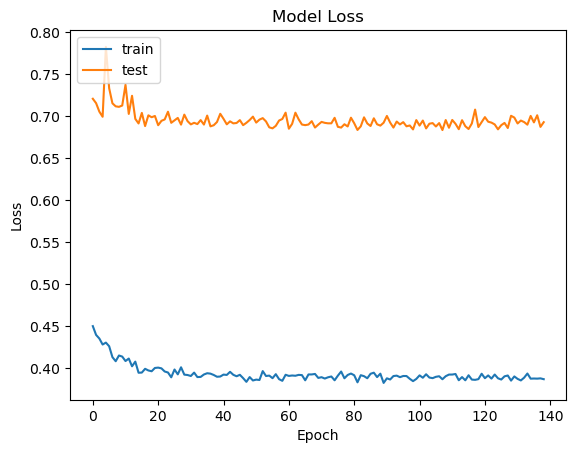

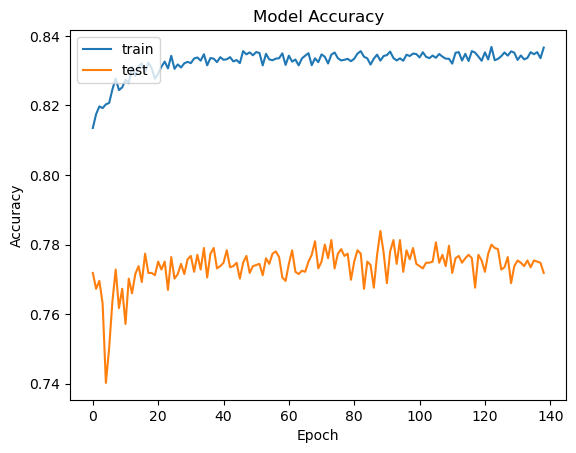

In [27]:
# Plot training history (loss and accuracy)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Load test data
x_test = []
y_test = []

for i, c in enumerate(classes):
    path = os.path.join(test_dir, c)
    for img_name in os.listdir(path):
        img = cv2.imread(os.path.join(path, img_name))
        if img is not None:  # Ensure the image was read correctly
            if greyscale:
                img = cv2.resize(img, (48, 48))
                # Image to greyscale and shape (48, 48, 1)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img = np.expand_dims(img, axis=-1)  # Add channel dimension for greyscale images
            # Normalize the image
            img = img / 255.0
            x_test.append(img)
            y_test.append(i)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Bruh, why you taking so long..

y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=7)

# # Print one image as matrix
# print(x_test[0].shape)
# print(type(x_test))
# print(x_test[0])

In [29]:
# # As a test, print one image from the training set
# print(train_ds.take(1))
# for img, label in train_ds.take(1):
#     print(img[0])
#     print(label[0])

Model saved as emotion_recognition_model.h5
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6624 - loss: 1.6232
[3.052497625350952, 0.43741852045059204]
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       162
           1       0.47      0.55      0.51       160
           2       0.48      0.64      0.55        74
           3       0.93      0.85      0.89      1185
           4       0.07      0.12      0.09       478
           5       0.02      0.03      0.02       329
           6       0.04      0.02      0.02       680

    accuracy                           0.44      3068
   macro avg       0.39      0.42      0.40      3068
weighted avg       0.46      0.44      0.44      3068

Confusion Matrix:
 [[ 118   10    7    9    8    7    3]
 [  11   88    2   11   29   16    3]
 [   3    2   47    5    6    7    4]
 [   8   28   15 1011   79   37    7]
 [  11   14

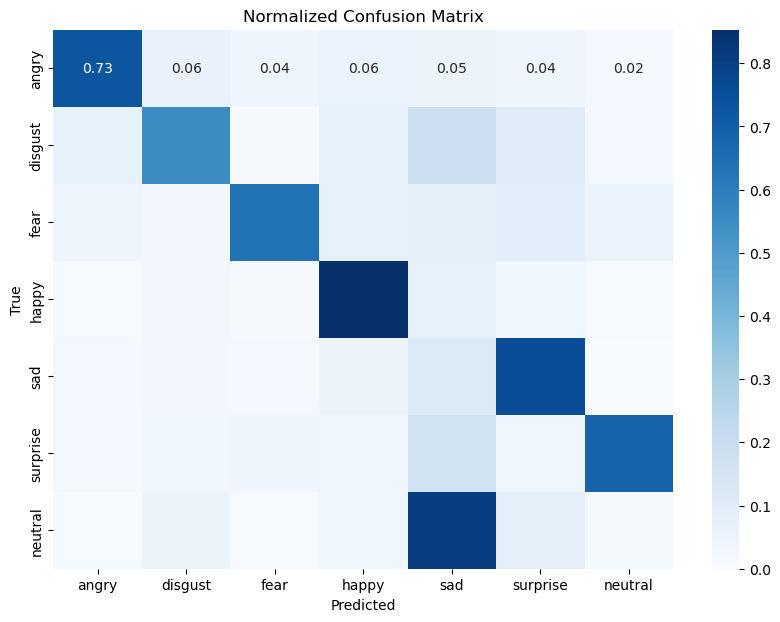

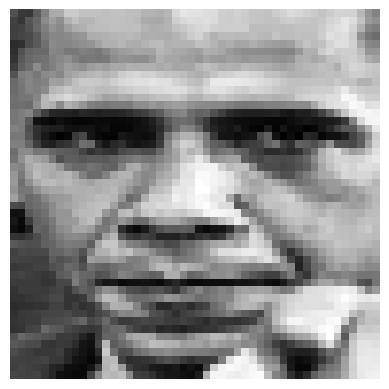

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Predicted emotion: angry


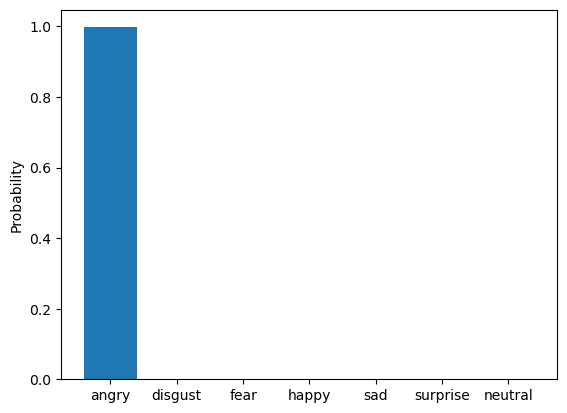

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


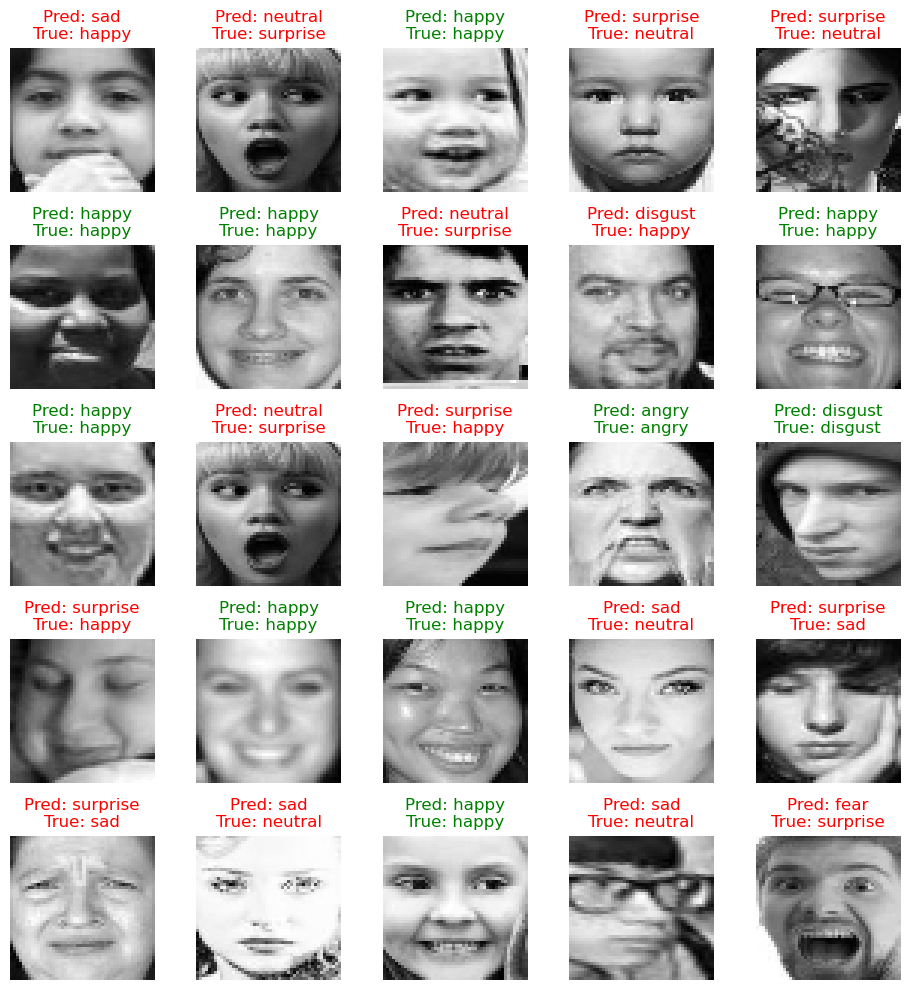

In [30]:
# if history is not None:

#     # PLOT TRAINING AND VALIDATION ACCURACY
#     plt.plot(history.history['accuracy'], label='accuracy')
#     plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend(loc='lower right')
#     plt.show()

#     # PLOT TRAINING AND VALIDATION LOSS
#     plt.plot(history.history['loss'], label='loss')
#     plt.plot(history.history['val_loss'], label = 'val_loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend(loc='upper right')
#     plt.show()
    
#     # Zugreifen auf die Metriken im Trainingsverlauf
#     accuracy = history.history['accuracy']
#     val_accuracy = history.history['val_accuracy']

#     # Beispielausgabe der Genauigkeit
#     print("Training Accuracy:", accuracy)
#     print("Validation Accuracy:", val_accuracy)


# SAVE MODEL, if model is defined

if model is not None: 
    model.save('emotion_recognition_model.h5')
    print('Model saved as emotion_recognition_model.h5')
else:
    # Load model
    model = tf.keras.models.load_model('emotion_recognition_model.h5')
    print('Model loaded from emotion_recognition_model.h5')

# Confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Evaluate model
evaluation = model.evaluate(x_test, y_test_encoded)

# print evaluation
print(evaluation)

# Predict test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

from sklearn.metrics import classification_report
print('Classification Report:\n', classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Confusion Matrix:\n", cm)
print("Normalized Confusion Matrix:\n", cm_normalized)

# Display normalized confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix')
plt.show()

# TEST MODEL
# Load test image
file_path = 'dataset_RAF_DB/test/angry/test_0037_aligned.jpg'
img = x_test[0]

# Display image (back to original size)
img = np.reshape(img, [48, 48])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

img = x_test[0]
img = np.reshape(img, [1, 48, 48, 1])
# Predict emotion
prediction = model.predict(img)
emotion = classes[np.argmax(prediction)]
print(f'Predicted emotion: {emotion}')

# Display prediction
plt.bar(classes, prediction[0])
plt.ylabel('Probability')
plt.show()

# 5x5 matrix with random pictures from the test set, labeled with the predicted emotion and the true emotion; text color is green if the prediction is correct, red otherwise
import random

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    index = random.randint(0, len(x_test) - 1)
    img = x_test[index]
    img = np.reshape(img, [1, 48, 48, 1])
    prediction = model.predict(img)
    emotion = classes[np.argmax(prediction)]
    true_emotion = classes[y_test[index]]
    color = 'g' if emotion == true_emotion else 'r'
    # Image back to original size
    img = x_test[index]
    img = np.reshape(img, [48, 48])
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {emotion}\nTrue: {true_emotion}', color=color)
    plt.axis('off')
    plt.tight_layout()
    
plt.show()